<a href="https://colab.research.google.com/github/AkritiGhosh/HackerEarth-Challenge/blob/master/Machine%20Learning/EmployeeAttritionRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
def encode_object(data):
  encoder = LabelEncoder()
  for col in data.select_dtypes('object'):
    key = encoder.fit_transform(data.loc[:, col].values)
    value = data.loc[:, col].values
    data.loc[:, col] = key
  return data

In [3]:
def count_null(data):
  print(data.isnull().sum())

In [4]:
def fill(table):
  count_null(table)
  for col in table.columns:
    table[col]=table[col].fillna(method='ffill')
    table[col]=table[col].fillna(method='bfill')
  print("\nAfter filling")
  count_null(table)
  return table

In [5]:
def preprocessing(data):
  data = fill(data)
  data = encode_object(data)
  data.head(15)
  return data

In [6]:
def feature_label_split(data):
  x = data.iloc[:, 0:23]
  y = data.iloc[:, 23].to_frame()
  print(x.columns)
  print(y.columns)
  return x,y

In [7]:
train_upload = files.upload()

Saving Train.csv to Train.csv


In [8]:
train_set = pd.read_csv(io.StringIO(train_upload['Train.csv'].decode('utf-8')))
print("Size of training dataset: ", train_set.shape)
print("Types of datasets: ", type(train_set))

Size of training dataset:  (7000, 24)
Types of datasets:  <class 'pandas.core.frame.DataFrame'>


In [9]:
train_set = preprocessing(train_set)
x , y = feature_label_split(train_set)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Training set size:", x_train.shape, y_train.shape, sep=' ')
print("Testing set size:", x_test.shape, y_test.shape, sep=' ')

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

After filling
Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                 

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

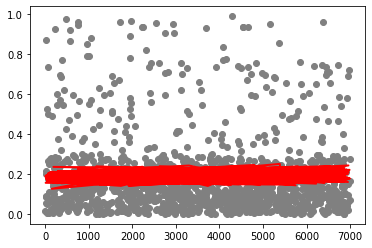

In [11]:
plt.scatter(x_test.iloc[:,0], y_test,  color='gray')
plt.plot(x_test.iloc[:,0], y_pred, color='red', linewidth=2)
plt.show()

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.128926769049549
Mean Squared Error: 0.03579716863592868
Root Mean Squared Error: 0.18920139702425212


In [13]:
rmsq = sqrt(metrics.mean_squared_error(y_test, y_pred))
score = 100*max(0,1-rmsq)
print(score)

81.0798602975748


In [15]:
test_upload = files.upload()

Saving Test.csv to Test.csv


In [16]:
test_set = pd.read_csv(io.StringIO(test_upload['Test.csv'].decode('utf-8')))
print("Size of testing dataset:", test_set.shape)
id = test_set.iloc[:,0].to_frame()
test_set = preprocessing(test_set)

Size of testing dataset: (3000, 23)
Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

After filling
Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown              

In [17]:
rates = pd.DataFrame(model.predict(test_set), columns=['Attrition_rate'])
result = pd.concat([id, rates], axis=1, sort=False)
result.head(10)

,Employee_ID,Attrition_rate
0,EID_22713,0.207528
1,EID_9658,0.217271
2,EID_22203,0.184810
3,EID_7652,0.203110
4,EID_6516,0.181819
5,EID_20283,0.159990
6,EID_21014,0.186455
7,EID_7693,0.191451
8,EID_13232,0.186085
9,EID_6515,0.218841


In [18]:
result.to_csv(r'./Result.csv', index = False, header=True)
files.download('Result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>